In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)


In [14]:
data= yf.download("AAPL", start="2024-01-01", end="2024-12-31")


[*********************100%***********************]  1 of 1 completed


In [15]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290421,187.070068,182.553143,185.789438,82488700
2024-01-03,182.910507,184.528662,182.096461,182.880727,58414500
2024-01-04,180.587524,181.758939,179.565014,180.825770,71983600
2024-01-05,179.862854,181.431370,178.860202,180.666978,62303300
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500


In [16]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,206.099001,207.790887,204.114435,205.837262,5.719756e+07
std,25.556235,25.627489,25.176003,25.368220,3.087430e+07
min,164.009476,165.401065,163.095000,164.357373,2.323470e+07
25%,182.977516,184.078791,181.209120,182.515527,4.187125e+07
50%,213.242752,215.770909,210.933540,212.934181,4.994790e+07
75%,226.542130,228.439398,224.519553,226.583497,6.295815e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


In [17]:
data.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

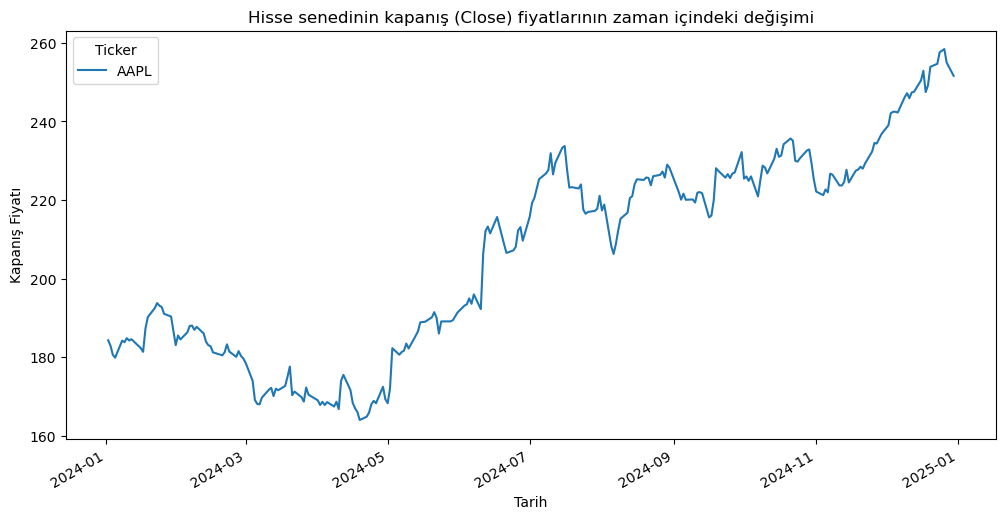

In [18]:
data["Close"].plot(figsize=(12,6))
plt.title("Hisse senedinin kapanış (Close) fiyatlarının zaman içindeki değişimi")
plt.xlabel("Tarih")
plt.ylabel("Kapanış Fiyatı")
plt.show()

In [19]:
data['MA20'] = data['Close'].rolling(window=20).mean()
print(data[['Close', 'MA20']].head(25))


Price            Close        MA20
Ticker            AAPL            
Date                              
2024-01-02  184.290421         NaN
2024-01-03  182.910507         NaN
2024-01-04  180.587524         NaN
2024-01-05  179.862854         NaN
2024-01-08  184.210999         NaN
2024-01-09  183.794052         NaN
2024-01-10  184.836426         NaN
2024-01-11  184.240784         NaN
2024-01-12  184.568375         NaN
2024-01-16  182.295029         NaN
2024-01-17  181.351929         NaN
2024-01-18  187.258682         NaN
2024-01-19  190.167374         NaN
2024-01-22  192.480438         NaN
2024-01-23  193.761063         NaN
2024-01-24  193.086014         NaN
2024-01-25  192.758408         NaN
2024-01-26  191.021118         NaN
2024-01-29  190.336151         NaN
2024-01-30  186.672974  186.524556
2024-01-31  183.059418  186.463006
2024-02-01  185.501541  186.592558
2024-02-02  184.498886  186.788126
2024-02-05  186.315598  187.110763
2024-02-06  187.923813  187.296404


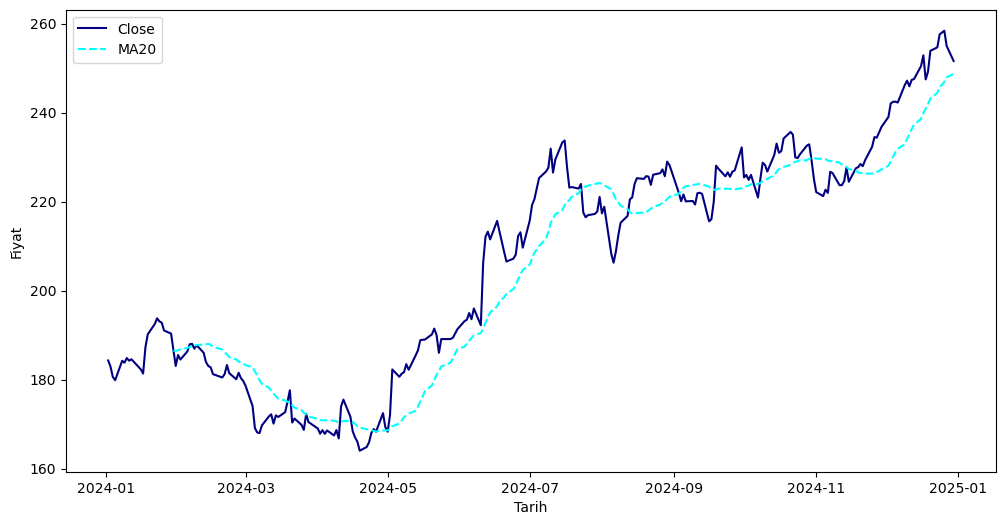

In [21]:
plt.figure(figsize=(12,6))
plt.plot(data["Close"], label='Close', color='navy')
plt.plot(data["MA20"].dropna(), label='MA20', color='cyan', linestyle='--')
plt.ylabel("Fiyat")
plt.xlabel("Tarih")
plt.legend()
plt.show()


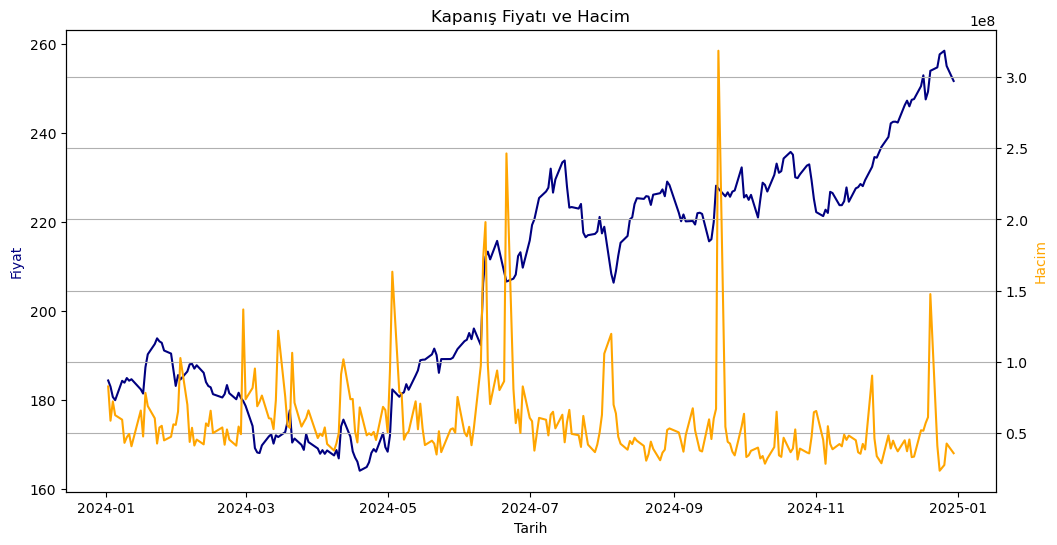

In [23]:
plt.figure(figsize=(12,6))

# Fiyat grafiği sol eksen
plt.plot(data['Close'], color='navy', label='Kapanış Fiyatı')

# Hacim grafiği ikincil eksen olarak değil, ayrı çizilir.
plt.ylabel('Fiyat', color='navy')
plt.xlabel('Tarih')
plt.twinx()  #Aynı grafik üzerinde ikinci bir y-ekseni (sağ taraf) oluştururuz.

# Hacim grafiği sağ eksen
plt.plot(data['Volume'], color='orange', label='Hacim')
plt.ylabel('Hacim', color='orange')

plt.title('Kapanış Fiyatı ve Hacim')
plt.grid(True) # Arka planda ızgara çizgilerini açar ve okumayı kolaylaştırır, görseli daha profesyonel yapar.
plt.show()
